In [200]:
import tensorflow as tf

In [201]:
from tensorflow.keras import Sequential

In [202]:
from tensorflow.keras.layers import Dense,Flatten

In [203]:
from tensorflow.keras import layers

In [204]:
from tensorflow.keras.datasets import cifar10

In [205]:
import numpy as np

In [206]:
import cv2

In [207]:
import matplotlib.pyplot as plt 

In [208]:
cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [209]:
(X_train,y_train), (X_test,y_test)  = cifar10.load_data()

In [210]:
X_train.shape

(50000, 32, 32, 3)

In [211]:
X_test.shape

(10000, 32, 32, 3)

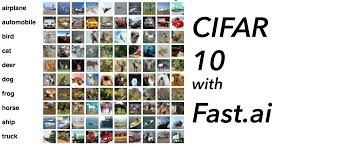

In [212]:
# min to max convert 

In [213]:
X_train_sca = X_train/255
X_test_sca = X_test/255

Text(0.5, 1.0, '[array([6], dtype=uint8)]')

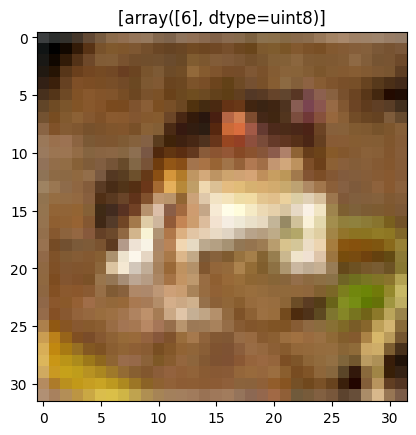

In [214]:
plt.imshow(X_train[0])
plt.title([y_train[0]])

In [215]:
data = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

In [216]:
data

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [217]:
print(data)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


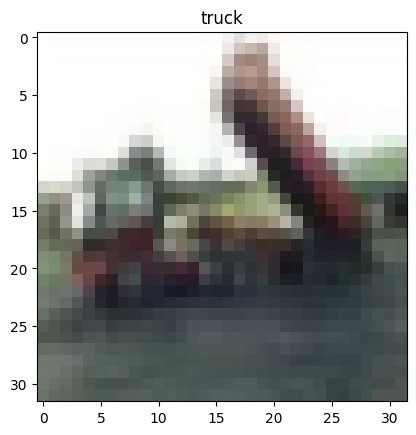

In [218]:
plt.imshow(X_train[2])
plt.title(data[y_train[2][0]])
plt.show()

# Model ANN

In [219]:
model = Sequential([
    Flatten(),
    Dense(500,activation='relu',input_shape= (32,32,3)),
    Dense(1000,activation='relu'),
    Dense(2000,activation='relu'),
    Dense(100,activation='relu'),
    Dense(len(data),activation='softmax',input_shape= (32,32,3))
    
    
])

C:\Users\arjun\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [220]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])

In [221]:
model.fit(X_train_sca,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 65ms/step - accuracy: 0.2277 - loss: 2.0579
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.3572 - loss: 1.7748
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.3922 - loss: 1.6885
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.4148 - loss: 1.6242
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.4237 - loss: 1.5907


# Model CNN 

In [222]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [223]:
model_cnn = Sequential([
    Conv2D(32,(3,3),padding = 'same',activation = 'relu'),
    # conv 32 is filter 3* 3 array ke 
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
    MaxPool2D((2,2)),
    
    Conv2D(32,(3,3),padding = 'same',activation = 'relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(100,activation = 'relu'),
    Dense(len(data),activation = 'softmax')
    
    
    
])

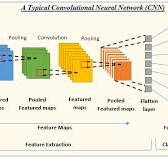

In [224]:
model_cnn.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])

In [225]:
model_cnn.fit(X_train_sca,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.3527 - loss: 1.7546
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6002 - loss: 1.1173
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6738 - loss: 0.9275
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7125 - loss: 0.8140
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7413 - loss: 0.7352


In [226]:
# cnn and ann size of image is same 

In [227]:
y_pred_cnn = model_cnn.predict(X_train_sca)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step


In [228]:
y_pred_ann = model.predict(X_train_sca)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step


In [229]:
y_pred_ann


array([[4.5844009e-03, 2.1035406e-03, 7.7900849e-02, ..., 7.6736975e-03,
        3.3808083e-04, 2.1285221e-03],
       [4.3462034e-02, 5.0819910e-01, 6.3412632e-03, ..., 9.6174320e-03,
        1.2021815e-01, 2.8667438e-01],
       [3.6091130e-02, 7.8032687e-02, 7.4717629e-04, ..., 6.8009766e-03,
        1.4730899e-01, 7.2598225e-01],
       ...,
       [7.3574156e-02, 1.0135035e-01, 6.2529102e-04, ..., 1.7541134e-03,
        3.4631169e-01, 4.7526667e-01],
       [3.0933425e-02, 1.4188750e-01, 3.7010000e-04, ..., 4.7312188e-04,
        6.2309402e-01, 2.0250419e-01],
       [1.4627646e-01, 7.2209731e-02, 4.1141436e-02, ..., 2.3095834e-01,
        9.7357206e-02, 2.4964595e-01]], dtype=float32)

In [230]:
y_train_flat = y_train.flatten()
y_train_flat

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [231]:
y_test_flat = y_test.flatten()
y_test_flat

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [232]:
y_train_flat[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [233]:
y_test_flat[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [234]:
y_pred_ann = [np.argmax(i) for i in y_pred_ann]
y_pred_cnn = [np.argmax(i) for i in y_pred_cnn]

In [235]:
y_pred_ann[:5]

[6, 1, 9, 6, 8]

In [236]:
y_pred_cnn[:5]

[6, 9, 9, 4, 1]

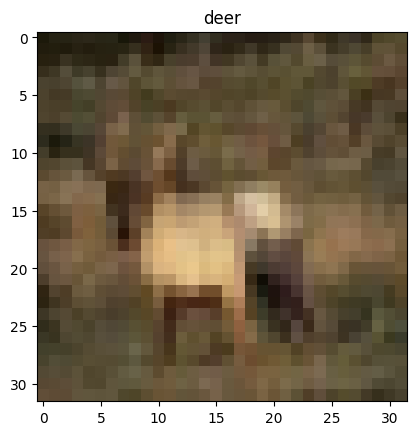

In [237]:
plt.imshow(X_train[3])
plt.title(data[y_train[3][0]])
plt.show()

In [238]:
import random 

In [239]:
random_number = random.randint(1,2000)

In [240]:
random_number 

353

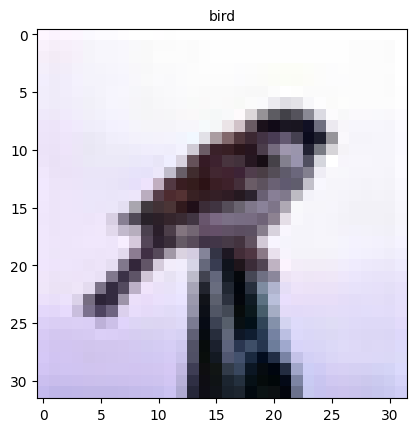

In [241]:
plt.imshow(X_test[random_number])
plt.title(data[y_test[random_number][0]],fontsize = 10)
plt.show()

In [242]:
X_test[random_number]

array([[[254, 246, 255],
        [251, 243, 254],
        [253, 245, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 241, 252],
        [246, 238, 249],
        [247, 239, 250],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [255, 255, 255]],

       [[246, 238, 249],
        [243, 235, 246],
        [245, 237, 248],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [255, 255, 255]],

       ...,

       [[210, 197, 244],
        [207, 195, 240],
        [208, 196, 242],
        ...,
        [211, 210, 244],
        [212, 212, 246],
        [219, 218, 252]],

       [[203, 191, 239],
        [201, 189, 236],
        [201, 190, 237],
        ...,
        [203, 202, 239],
        [206, 206, 242],
        [214, 212, 249]],

       [[196, 186, 237],
        [191, 182, 232],
        [191, 182, 232],
        ...,
        [199, 198, 237],
        [202, 201, 240],
        [208, 206, 246]]

In [243]:
import pickle
with open('cnn_model.pickle','wb') as f:
    pickle.dump(model_cnn,f)
print('done')

done


In [244]:
X_test[random_number].shape

(32, 32, 3)

In [245]:
test_data = np.expand_dims(X_test[random_number],axis=0)

In [246]:
test_data

array([[[[254, 246, 255],
         [251, 243, 254],
         [253, 245, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[249, 241, 252],
         [246, 238, 249],
         [247, 239, 250],
         ...,
         [252, 252, 252],
         [251, 251, 251],
         [255, 255, 255]],

        [[246, 238, 249],
         [243, 235, 246],
         [245, 237, 248],
         ...,
         [252, 252, 252],
         [251, 251, 251],
         [255, 255, 255]],

        ...,

        [[210, 197, 244],
         [207, 195, 240],
         [208, 196, 242],
         ...,
         [211, 210, 244],
         [212, 212, 246],
         [219, 218, 252]],

        [[203, 191, 239],
         [201, 189, 236],
         [201, 190, 237],
         ...,
         [203, 202, 239],
         [206, 206, 242],
         [214, 212, 249]],

        [[196, 186, 237],
         [191, 182, 232],
         [191, 182, 232],
         ...,
         [199, 198, 237],
        

In [247]:
data[np.argmax(model_cnn.predict(test_data))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


'bird'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


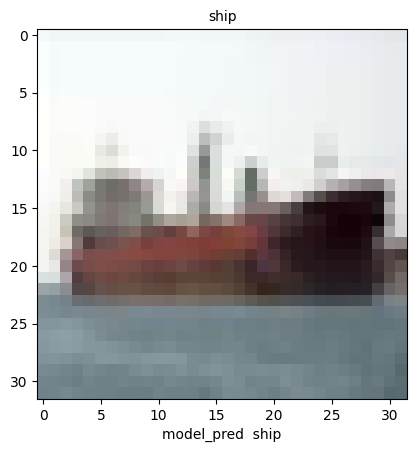

In [248]:
random_number = random.randint(1,2000)
test_data = np.expand_dims(X_test[random_number],axis=0)
model_pred= data[np.argmax(model_cnn.predict(test_data))]

plt.imshow(X_test[random_number])
plt.title(data[y_test[random_number][0]],fontsize = 10)
plt.xlabel(f"model_pred  {model_pred}")
plt.show()

In [249]:
model_cnn.predict(test_data).max()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


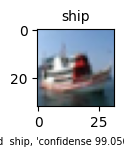

In [250]:
plt.figure(figsize=(1,1))

random_number = random.randint(1,2000)
test_data = np.expand_dims(X_test_sca[random_number],axis=0)
model_pred= data[np.argmax(model_cnn.predict(test_data))]
model_confidense = model_cnn.predict(test_data).max()
plt.imshow(X_test_sca[random_number])
plt.title(data[y_test[random_number][0]],fontsize = 10)
plt.xlabel(f"model_pred  {model_pred}, 'confidense {model_confidense*100} %'",fontsize = 7)
plt.show()

In [251]:
model_cnn.evaluate(X_test_sca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7075 - loss: 0.8163


[0.8334468603134155, 0.7057999968528748]

In [252]:
from sklearn.metrics import confusion_matrix

In [254]:
 confusion_matrix(y_test_flat,y_pred_cnn[:10000])

array([[ 84,  90, 120, 132,  86,  66, 140,  98,  99,  85],
       [ 71,  79, 128, 111,  87,  74, 127,  93, 127, 103],
       [ 86,  97, 108, 145,  81,  68, 142,  97,  86,  90],
       [ 97,  93, 123, 134,  72,  47, 115, 119,  94, 106],
       [ 87,  87, 129, 115,  98,  63, 139,  85,  97, 100],
       [ 77, 102, 116, 119,  85,  69, 133, 110,  93,  96],
       [ 96,  98, 104, 127,  70,  69, 124, 104, 109,  99],
       [ 83,  95, 106, 141,  88,  70, 115,  99, 121,  82],
       [ 80,  96, 106, 132,  96,  58, 131,  86,  97, 118],
       [ 86,  77, 108, 135,  93,  52, 139,  88, 123,  99]], dtype=int64)

In [255]:
import seaborn as sns

<Axes: >

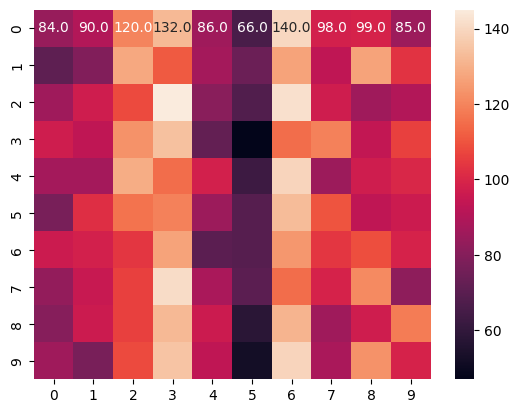

In [261]:
sns.heatmap(confusion_matrix(y_test,y_pred_cnn[:10000]),annot = True,fmt = '.1f')

In [ ]:
confusion_

In [188]:
from sklearn.metrics import classification_report

In [257]:
print(classification_report(y_test,y_pred_cnn[:10000]))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09      1000
           1       0.09      0.08      0.08      1000
           2       0.09      0.11      0.10      1000
           3       0.10      0.13      0.12      1000
           4       0.11      0.10      0.11      1000
           5       0.11      0.07      0.08      1000
           6       0.10      0.12      0.11      1000
           7       0.10      0.10      0.10      1000
           8       0.09      0.10      0.09      1000
           9       0.10      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



In [194]:
y_pred_cnn

[6,
 9,
 9,
 4,
 1,
 1,
 4,
 7,
 8,
 3,
 4,
 7,
 7,
 8,
 9,
 9,
 9,
 4,
 6,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 7,
 7,
 8,
 0,
 9,
 1,
 3,
 4,
 2,
 3,
 7,
 8,
 4,
 2,
 2,
 2,
 7,
 1,
 1,
 1,
 0,
 4,
 0,
 0,
 3,
 7,
 0,
 2,
 2,
 2,
 2,
 4,
 8,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 8,
 7,
 8,
 2,
 1,
 6,
 7,
 4,
 1,
 9,
 0,
 7,
 1,
 0,
 5,
 4,
 8,
 4,
 7,
 4,
 7,
 9,
 2,
 8,
 2,
 8,
 0,
 7,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 1,
 8,
 1,
 0,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 4,
 6,
 6,
 1,
 9,
 7,
 8,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 0,
 2,
 8,
 0,
 4,
 4,
 6,
 2,
 4,
 1,
 0,
 3,
 4,
 4,
 3,
 7,
 4,
 4,
 8,
 5,
 3,
 7,
 5,
 1,
 8,
 7,
 7,
 6,
 0,
 9,
 4,
 1,
 3,
 8,
 2,
 7,
 3,
 3,
 4,
 1,
 5,
 7,
 4,
 4,
 7,
 5,
 8,
 1,
 8,
 9,
 6,
 9,
 2,
 0,
 2,
 8,
 8,
 2,
 7,
 2,
 3,
 7,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 9,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 3,
 8,
 3,
 2,
 9,
 8,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 4,
 0,
 6,
 4,
 1,
 7,
 1,
 5,
 8,
 2,
 4,
 6,
 8,
 6,
 8,
 4,
 2,
 6,


In [196]:
y_test_flat= y_test.flatten()

In [197]:
y_test_flat

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [198]:
print(y_test_flat.shape)  # should be (10000,)
print(y_pred_cnn.shape)

(10000,)


AttributeError: 'list' object has no attribute 'shape'

In [199]:
print(y_pred_cnn.shape)

AttributeError: 'list' object has no attribute 'shape'